# Results: Quantum Pattern Recognition with Boson-Sampling

In [1]:
import os
import numpy as np
from utils import *

# Loading the data
file_paths = os.path.expanduser("~") + '/Dropbox/BS-Tomography/RegresionData/Data4Modes/4Modes_'
file_names = (
    '1photon/Data2.npz',
    '2photon/Data_2photons.npz',
    '3photons/Data_3photons.npz',
    'entanglement/entanglement_state_1/Entanglement_state.npz',
    'entanglement/entanglement_state_2/Entanglement_state_2photons.npz',
    'entanglement/entanglement_state_3/Entanglement_state_3photons.npz'
    )
names = (
    '1photon',
    '2photon',
    '3photon',
    'ent1',
    'ent2',
    'ent3'
)

# NOTE: a for angles
param_names = dict(zip(names ,[
    ['a.0', 'a.1'],
    ['r.0', 'r.1', 'r.2', 'a.0', 'a.1', 'a.2'],
    ['r.0', 'r.1', 'r.2', 'r.3', 'a.0', 'a.1', 'a.2', 'a.3'],
    ['E'],
    ['E'],
    ['E']
]))

data = {name: load_data(file_paths+path) for name, path in zip(names, file_names)}

X = {}
P = {}
for name in names:
    X[name], P[name] = get_dataframe(data[name], param_names[name])

# Dimensionality Reduction using PCA
X_PCA = {name: pca(X[name]) for name in names}
print(f'Before and after dimensionality reduction explained variance ratio at {pca.__defaults__[0]}\n')
_ = [print(f'{name} : {X[name].shape[1]} \t {X_PCA[name].shape[1]}') for name in names]

# Training and Test Split
xy = {name: tts(X[name], P[name], test_size=0.2, random_state=0) for name in names}
xy_pca = {name: tts(X_PCA[name], P[name], test_size=0.2, random_state=0) for name in names}

results_fidelity = []
results_fidelity_pca = []

Before and after dimensionality reduction explained variance ratio at 0.999

1photon : 2401 	 3
2photon : 4096 	 8
3photon : 6561 	 14
ent1 : 4096 	 9
ent2 : 10000 	 20
ent3 : 20736 	 24


## Description of the data

We have 6 datasets:

* 1 photon : two parameters ($\beta, \phi_1$)
* 2 photon : five parameters ($r_0, r_1, r_2$), ($\phi_0, \phi_1, \phi_2$); $\phi_0 = 0$
* 3 photon : seven parameters ($r_0, r_1, r_2, r_3$), ($\phi_0, \phi_1, \phi_2, \phi_3$); $\phi_0 = 0$
* Entangled 1: one parameter $E$
* Entangled 2: one parameter $E$
* Entangled 3: one parameter $E$

### 4 MODES 1 PHOTON

$|\eta_3 > = cos \beta |0> + sin \beta e^{i\phi_1} = r_0|0> + r_1 e^{i\phi_1}$


In [2]:
name = '1photon'
P[name].head()

,a.0,a.1
0,2.681106,5.677277
1,3.442891,3.251803
2,1.573461,1.808171
3,2.458029,5.457656
4,4.212859,5.054799


In [3]:
model = etr_reg(xy[name])
scores(model)
model_pca = etr_reg(xy_pca[name])
scores(model)

Model: [ExtraTreesRegressor(n_estimators=400, random_state=0)] 	 Score: [-0.1978806634817888]

Model: [ExtraTreesRegressor(n_estimators=400, random_state=0)] 	 Score: [-0.1978806634817888]



In [4]:
# pca and non-pca give the same R2-score so we use the simplest one
fid1_etr = fidelity_1(real=model['real'] ,predictions=model['preds'])
res1_etr = pd.DataFrame(fid1_etr, columns=['1_etr'])
results_fidelity.append(res1_etr)
res1_etr.describe()

,1_etr
count,200.000000
mean,0.719850
std,0.227072
min,0.069204
25%,0.557748
50%,0.751323
75%,0.916520
max,0.999996


In [5]:
# pca and non-pca give the same R2-score so we use the simplest one
fid1_etr = fidelity_1(real=model_pca['real'] ,predictions=model_pca['preds'])
res1_etr = pd.DataFrame(fid1_etr, columns=['1_etr'])
results_fidelity_pca.append(res1_etr)
res1_etr.describe()

,1_etr
count,200.000000
mean,0.628490
std,0.236488
min,0.041774
25%,0.447965
50%,0.650958
75%,0.828790
max,0.999078


In [5]:
model = svr_reg(xy[name])
scores(model)
model_pca = svr_reg(xy_pca[name])
scores(model_pca)

Model: [SVR(), SVR()] 	 Score: [-0.06526076698606476, -0.0694580639515947]

Model: [SVR(), SVR()] 	 Score: [-0.0963261158619082, -0.12513922270867583]



In [6]:
# pca and non-pca give almost the same R2-score so we use the simplest one
fid1_svr = fidelity_1(real=model['real'] ,predictions=model['preds'])
res1_svr = pd.DataFrame(fid1_svr, columns=['1_svr'])
results_fidelity.append(res1_svr)
res1_svr.describe()

,1_svr
count,200.000000
mean,0.823151
std,0.190404
min,0.054745
25%,0.740702
50%,0.881910
75%,0.970362
max,0.999827


In [8]:
# pca and non-pca give almost the same R2-score so we use the simplest one
fid1_svr = fidelity_1(real=model_pca['real'] ,predictions=model_pca['preds'])
res1_svr = pd.DataFrame(fid1_svr, columns=['1_svr'])
results_fidelity_pca.append(res1_svr)
res1_svr.describe()

,1_svr
count,200.000000
mean,0.816223
std,0.221873
min,0.058625
25%,0.734036
50%,0.908766
75%,0.986301
max,0.999982


### 4 MODES 2 PHOTON

In [9]:
name = '2photon'
P[name].head()

,r.0,r.1,r.2,a.0,a.1,a.2
0,0.314496,0.802115,0.507645,0.0,2.411273,1.772315
1,0.603787,0.761947,0.234259,0.0,2.258162,3.753475
2,0.689093,0.370180,0.622991,0.0,0.085760,1.398414
3,0.957086,0.289716,0.007130,0.0,5.134881,2.037236
4,0.730309,0.682936,0.015724,0.0,1.649952,3.761950


In [10]:
model = etr_reg(xy[name])
scores(model)
model_pca = etr_reg(xy_pca[name])
scores(model)

Model: [ExtraTreesRegressor(n_estimators=400, random_state=0)] 	 Score: [0.848818882038656]

Model: [ExtraTreesRegressor(n_estimators=400, random_state=0)] 	 Score: [0.848818882038656]



In [11]:
npreds = norm(model['preds'])
npreds.head()
fid2_etr = fidelity_2(model['real'], npreds)
res2_etr = pd.DataFrame(fid2_etr, columns=['2_etr'])
results_fidelity.append(res2_etr)
res2_etr.describe()

,2_etr
count,200.000000
mean,0.900017
std,0.191405
min,0.138863
25%,0.934672
50%,0.987036
75%,0.994959
max,0.999894


In [12]:
npreds = norm(model_pca['preds'])
npreds.head()
fid2_etr = fidelity_2(model_pca['real'], npreds)
res2_etr = pd.DataFrame(fid2_etr, columns=['2_etr'])
results_fidelity_pca.append(res2_etr)
res2_etr.describe()

,2_etr
count,200.000000
mean,0.922877
std,0.157877
min,0.050081
25%,0.947035
50%,0.981661
75%,0.992386
max,0.999749


In [13]:
model = svr_reg(xy[name])
scores(model)
model_pca = svr_reg(xy_pca[name])
scores(model_pca)

Model: [SVR(), SVR(), SVR(), SVR(), SVR(), SVR()] 	 Score: [0.9455768828556027, 0.9054181865949131, 0.9464830433081869, 1.0, 0.5266996532768887, 0.38809455232347534]

Model: [SVR(), SVR(), SVR(), SVR(), SVR(), SVR()] 	 Score: [0.9096359573276881, 0.9061318141586427, 0.9319535365082355, 1.0, 0.5830492017287403, 0.4181062673289363]



In [14]:
npreds = norm(model['preds'])
npreds.head()
fid2_svr = fidelity_2(model['real'], npreds)
res2_svr = pd.DataFrame(fid2_svr, columns=['2_svr'])
results_fidelity.append(res2_svr)
res2_svr.describe()

,2_svr
count,200.000000
mean,0.850400
std,0.204878
min,0.105860
25%,0.787348
50%,0.950054
75%,0.983219
max,0.998861


In [15]:
npreds = norm(model_pca['preds'])
npreds.head()
fid2_svr = fidelity_2(model_pca['real'], npreds)
res2_svr = pd.DataFrame(fid2_svr, columns=['2_svr'])
results_fidelity_pca.append(res2_svr)
res2_svr.describe()

,2_svr
count,200.000000
mean,0.867969
std,0.200754
min,0.127300
25%,0.811426
50%,0.963327
75%,0.991305
max,0.998994


### 4 MODES 3 PHOTON

In [2]:
name = '3photon'
P[name].head()

,r.0,r.1,r.2,r.3,a.0,a.1,a.2,a.3
0,0.216019,0.835665,0.123032,0.489758,0.0,3.859133,0.531111,2.757912
1,0.678245,0.226038,0.590947,0.373727,0.0,0.584273,3.665837,3.101988
2,0.426414,0.082644,0.815626,0.382224,0.0,5.090608,2.695038,5.662643
3,0.567067,0.290045,0.706686,0.308065,0.0,4.226067,2.989437,6.127577
4,0.118394,0.199173,0.228548,0.945557,0.0,1.705879,2.967568,5.823832


In [17]:
model = etr_reg(xy[name])
scores(model)
model_pca = etr_reg(xy_pca[name])
scores(model)

Model: [ExtraTreesRegressor(n_estimators=400, random_state=0)] 	 Score: [0.6816437061031928]

Model: [ExtraTreesRegressor(n_estimators=400, random_state=0)] 	 Score: [0.6816437061031928]



In [18]:
npreds = norm(model['preds'])
npreds.head()
fid3_etr = fidelity_2(model['real'], npreds)
res3_etr = pd.DataFrame(fid3_etr, columns=['3_etr'])
results_fidelity.append(res3_etr)
res3_etr.describe()

,3_etr
count,200.000000
mean,0.761558
std,0.206226
min,0.090518
25%,0.671530
50%,0.813736
75%,0.928541
max,0.988078


In [19]:
npreds = norm(model_pca['preds'])
npreds.head()
fid3_etr = fidelity_2(model_pca['real'], npreds)
res3_etr = pd.DataFrame(fid3_etr, columns=['3_etr'])
results_fidelity_pca.append(res3_etr)
res3_etr.describe()

,3_etr
count,200.000000
mean,0.787241
std,0.189888
min,0.116078
25%,0.702872
50%,0.852074
75%,0.936313
max,0.994355


In [5]:
model = svr_reg(xy[name],kernel='poly')
scores(model)
model_pca = svr_reg(xy_pca[name])
scores(model_pca)

Model: [SVR(kernel='poly'), SVR(kernel='poly'), SVR(kernel='poly'), SVR(kernel='poly'), SVR(kernel='poly'), SVR(kernel='poly'), SVR(kernel='poly'), SVR(kernel='poly')] 	 Score: [0.9240450823413321, 0.9051505303457971, 0.8904788282930598, 0.9241361807239017, 1.0, 0.4372248690608318, 0.33592930920400266, 0.12982184975013467]

Model: [SVR(), SVR(), SVR(), SVR(), SVR(), SVR(), SVR(), SVR()] 	 Score: [0.8981531780027968, 0.9058017243388665, 0.8973197452572667, 0.9015951312471415, 1.0, 0.5265597325842322, 0.39423205916216353, 0.039074562336622765]



In [6]:
npreds = norm(model['preds'])
npreds.head()
fid3_svr = fidelity_2(model['real'], npreds)
res3_svr = pd.DataFrame(fid3_svr, columns=['3_svr'])
results_fidelity.append(res3_svr)
res3_svr.describe()

,3_svr
count,200.000000
mean,0.735201
std,0.221150
min,0.063000
25%,0.620836
50%,0.802010
75%,0.926584
max,0.991405


In [22]:
npreds = norm(model_pca['preds'])
npreds.head()
fid3_svr = fidelity_2(model_pca['real'], npreds)
res3_svr = pd.DataFrame(fid3_svr, columns=['3_svr'])
results_fidelity_pca.append(res3_svr)
res3_svr.describe()

,3_svr
count,200.000000
mean,0.743020
std,0.212160
min,0.135495
25%,0.636835
50%,0.783768
75%,0.912941
max,0.998755


### Results for 4 MODES: 1,2,3 photons
#### Without pca

In [29]:
pd.concat(results_fidelity, axis=1).describe()

,1_etr,1_svr,2_etr,2_svr,3_etr,3_svr
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.719850,0.823151,0.900017,0.850400,0.761558,0.742530
std,0.227072,0.190404,0.191405,0.204878,0.206226,0.215096
min,0.069204,0.054745,0.138863,0.105860,0.090518,0.072721
25%,0.557748,0.740702,0.934672,0.787348,0.671530,0.639721
50%,0.751323,0.881910,0.987036,0.950054,0.813736,0.807703
75%,0.916520,0.970362,0.994959,0.983219,0.928541,0.914678
max,0.999996,0.999827,0.999894,0.998861,0.988078,0.992325


### Results for 4 MODES: 1,2,3 photons
#### With pca

In [31]:
print(pd.concat([results_fidelity_pca[0],results_fidelity_pca[2],results_fidelity_pca[4]], axis=1).describe().to_latex(index=False))

\begin{tabular}{rrr}
\toprule
     1\_etr &      2\_etr &      3\_etr \\
\midrule
200.000000 & 200.000000 & 200.000000 \\
  0.664226 &   0.922877 &   0.787241 \\
  0.250087 &   0.157877 &   0.189888 \\
  0.066888 &   0.050081 &   0.116078 \\
  0.467351 &   0.947035 &   0.702872 \\
  0.703973 &   0.981661 &   0.852074 \\
  0.892137 &   0.992386 &   0.936313 \\
  0.999233 &   0.999749 &   0.994355 \\
\bottomrule
\end{tabular}



In [32]:
print(pd.concat([results_fidelity_pca[1],results_fidelity_pca[3],results_fidelity_pca[5]], axis=1).describe().to_latex(index=False))

\begin{tabular}{rrr}
\toprule
     1\_svr &      2\_svr &      3\_svr \\
\midrule
200.000000 & 200.000000 & 200.000000 \\
  0.816223 &   0.867969 &   0.743020 \\
  0.221873 &   0.200754 &   0.212160 \\
  0.058625 &   0.127300 &   0.135495 \\
  0.734036 &   0.811426 &   0.636835 \\
  0.908766 &   0.963327 &   0.783768 \\
  0.986301 &   0.991305 &   0.912941 \\
  0.999982 &   0.998994 &   0.998755 \\
\bottomrule
\end{tabular}



In [24]:
pd.concat(results_fidelity_pca, axis=1).describe()

,1_etr,1_svr,2_etr,2_svr,3_etr,3_svr
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.664226,0.816223,0.922877,0.867969,0.787241,0.743020
std,0.250087,0.221873,0.157877,0.200754,0.189888,0.212160
min,0.066888,0.058625,0.050081,0.127300,0.116078,0.135495
25%,0.467351,0.734036,0.947035,0.811426,0.702872,0.636835
50%,0.703973,0.908766,0.981661,0.963327,0.852074,0.783768
75%,0.892137,0.986301,0.992386,0.991305,0.936313,0.912941
max,0.999233,0.999982,0.999749,0.998994,0.994355,0.998755


## 4 MODES ENTANGLEMENT

Here we don't have fidelity only the $R^2$-score to measure the performance of our model.

### 4 MODES ENTANGLEMENT 1

In [7]:
name = 'ent1'
model = etr_reg(xy[name],oaa=True)
scores(model)
model_pca = etr_reg(xy_pca[name],oaa=True)
scores(model_pca)

Model: [ExtraTreesRegressor(n_estimators=400, random_state=0)] 	 Score: [0.7948737607547275]

Model: [ExtraTreesRegressor(n_estimators=400, random_state=0)] 	 Score: [0.8270332572044895]



In [67]:
mean_absolute_error(model['real'], model['preds'])
def ae(real, preds):
    dif = np.array(real.squeeze())-np.array(preds.squeeze())
    return np.abs(dif)

ae_1 = ae(model['real'], model['preds'])
ae_1.mean()

0.0813025255019954

In [59]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def dummy_regressor(xtrain, xtest, ytrain, ytest):
    # predictions are always mean of ytrain
    preds = ytrain.mean().repeat(ytest.shape[0])
    model = 'dummy'

    model_mean = np.array(ytest.squeeze())-np.array(preds)
    model_mean_abs = np.abs(model_mean)
    # score is MAE
    score = mean_absolute_error(ytest, preds)

    return {'model':model, 'preds':preds, 'score':score, 'ae':model_mean_abs}

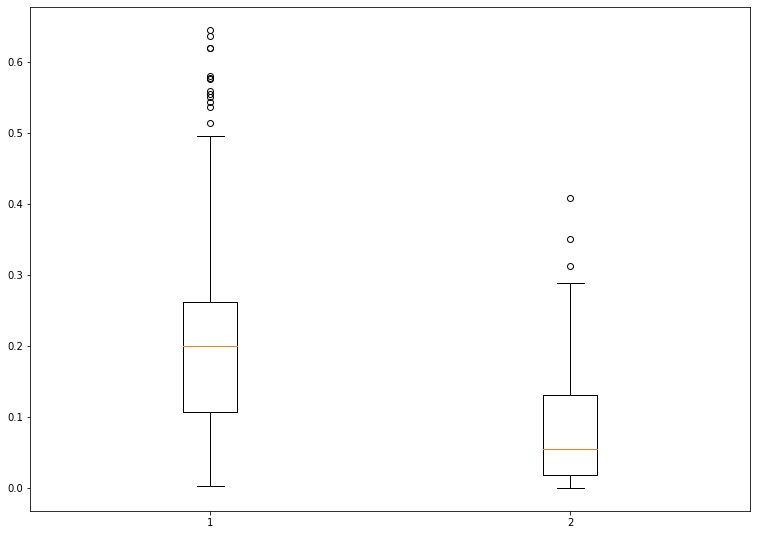

<Figure size 432x288 with 0 Axes>

In [69]:
dr = dummy_regressor(*xy[name])
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot([dr['ae'],ae_1])
 
# show plot
plt.show()
plt.savefig('boxplot_abs_error.png')

In [3]:
model['real'].describe()

,E
count,2.000000e+02
mean,2.973438e-01
std,2.505626e-01
min,2.070827e-07
25%,7.462753e-02
50%,2.408135e-01
75%,4.738974e-01
max,9.241359e-01


In [ ]:
#Model: [ExtraTreesRegressor(n_estimators=400, random_state=0)] 	 Score: [0.7948737607547275]

#Model: [ExtraTreesRegressor(n_estimators=400, random_state=0)] 	 Score: [0.8270332572044895]

In [2]:
name = 'ent1'
model = etr_reg(xy[name],oaa=True)
scores(model)
model_pca = etr_reg(xy_pca[name],oaa=True)
scores(model_pca)

Model: [ExtraTreesRegressor(bootstrap=True, n_estimators=400, random_state=0)] 	 Score: [0.7660878600703309]

Model: [ExtraTreesRegressor(bootstrap=True, n_estimators=400, random_state=0)] 	 Score: [0.8176839308726904]



### 4 MODES ENTANGLEMENT 2

In [4]:
name = 'ent2'
model = etr_reg(xy[name],oaa=True)
scores(model)
model_pca = etr_reg(xy_pca[name],oaa=True)
scores(model_pca)

Model: [ExtraTreesRegressor(bootstrap=True, n_estimators=400, random_state=0)] 	 Score: [0.6276552112171734]

Model: [ExtraTreesRegressor(bootstrap=True, n_estimators=400, random_state=0)] 	 Score: [0.7859780039803735]



In [ ]:
#Model: [ExtraTreesRegressor(n_estimators=400, random_state=0)] 	 Score: [0.6419504944635209]

#Model: [ExtraTreesRegressor(n_estimators=400, random_state=0)] 	 Score: [0.8007155625344009]


In [5]:
model['real'].describe()

,E
count,200.000000
mean,0.297822
std,0.325354
min,0.000002
25%,0.019212
50%,0.175649
75%,0.498251
max,1.175714


In [3]:
name = 'ent2'
model = etr_reg(xy[name],oaa=True)
scores(model)
model_pca = etr_reg(xy_pca[name],oaa=True)
scores(model_pca)

Model: [ExtraTreesRegressor(bootstrap=True, n_estimators=400, random_state=0)] 	 Score: [0.6276552112171734]

Model: [ExtraTreesRegressor(bootstrap=True, n_estimators=400, random_state=0)] 	 Score: [0.7859780039803735]



### 4 MODES ENTANGLEMENT 3

In [6]:
name = 'ent3'
model = etr_reg(xy[name],oaa=True)
scores(model)
model_pca = etr_reg(xy_pca[name],oaa=True)
scores(model_pca)

Model: [ExtraTreesRegressor(bootstrap=True, n_estimators=400, random_state=0)] 	 Score: [0.6642712057899037]

Model: [ExtraTreesRegressor(bootstrap=True, n_estimators=400, random_state=0)] 	 Score: [0.7342318636057175]



In [7]:
model['real'].describe()

,E
count,2.000000e+02
mean,1.597385e-01
std,2.423845e-01
min,1.052384e-07
25%,3.919150e-03
50%,4.259505e-02
75%,2.101384e-01
max,1.306677e+00


# Summary

Firstly, I have to point that PCA reduces greatly the number of features needed to perform regression keeping almost the same or even better performance in some cases.

The 4 Modes for 1, 2 and 3 photons datasets have good results in terms of $R^2$-score for our regression algorithms (SVR and ExtraTreesRegressor) except for the first one. This prompts me to think that maybe the first dataset is quite different from the rest, because one can see a tendency of the scores to drop when introducing more photons, but in this case our predictions show a negative $R^2$-score which means that our regression is arbitrarily wrong, nonetheless fidelity calculation shows us that mean/median values (they are almost the same) are approximately 0.64 and 0.85 for etr & svr each.

In terms of fidelity, all the 3 datasets are quite good, with values improved with pca reduction.
The $R^2$-scores for the last 3 datasets are also quite good, and also with values improved with pca reduction.